# A demonstration of oslo_method_python as of January 2019


Before this notebook is run on a new system, make sure to compile the Cython files by doing (in the top repo directory):

```python setup.py build_ext --inplace```

In [7]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.insert(0,"/home/jorgenem/gitrepos/oslo_method_python")
import oslo_method_python as om
import copy
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


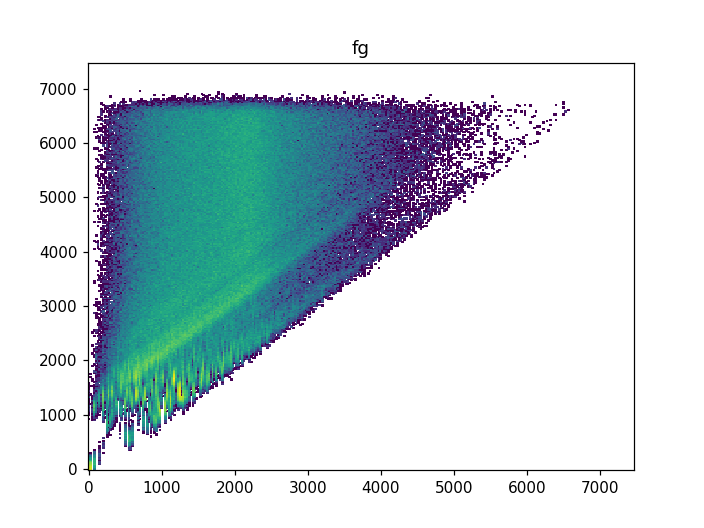

In [8]:
# Import fg matrix into instance of om.Matrix() and plot it
fname_fg = "synthetic_data/Jint_EB06_mama_4res/1Gen.m"
fg = om.Matrix()
fg.load(fname_fg)
fg.plot(title="fg")

In [9]:
# Run fit to rho and T

bin_width_out = 100
Ex_min = 4000
Ex_max = 6000
Eg_min = 1000


fg_std = copy.deepcopy(fg)
fg_std.matrix = np.sqrt(fg.matrix)

<IPython.core.display.Javascript object>


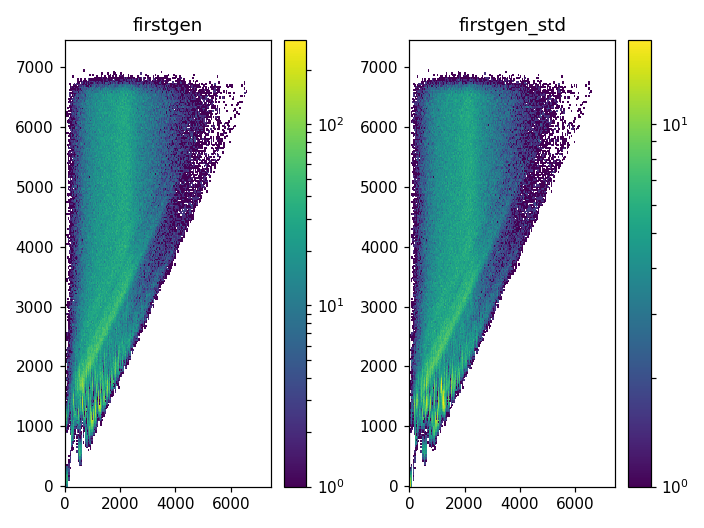

In [11]:
# Plot normalized matrices
f, (ax1, ax2) = plt.subplots(1,2)
cbar1 = fg.plot(ax=ax1, title="firstgen")
f.colorbar(cbar1, ax=ax1)
cbar2 = fg_std.plot(ax=ax2, title="firstgen_std")
f.colorbar(cbar2, ax=ax2)
plt.tight_layout(True)

masking_array = [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
Optimization terminated successfully.
         Current function value: 2654743.235176
         Iterations: 2
         Function evaluations: 3360
res =    direc: array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])
     fun: 2654743.2351756683
 message: 'Optimization terminated successfully.'
    nfev: 3360
     nit: 2
  status: 0
 success: True
       x: array([1.72047812e+05, 3.39246916e+04, 1.21334379e+16, 6.17585792e+00,
       6.17585792e+00, 6.17585792e+00, 6.17585792e+00, 6.17585792e+00,
       6.17585792e+00, 6.17585792

<IPython.core.display.Javascript object>


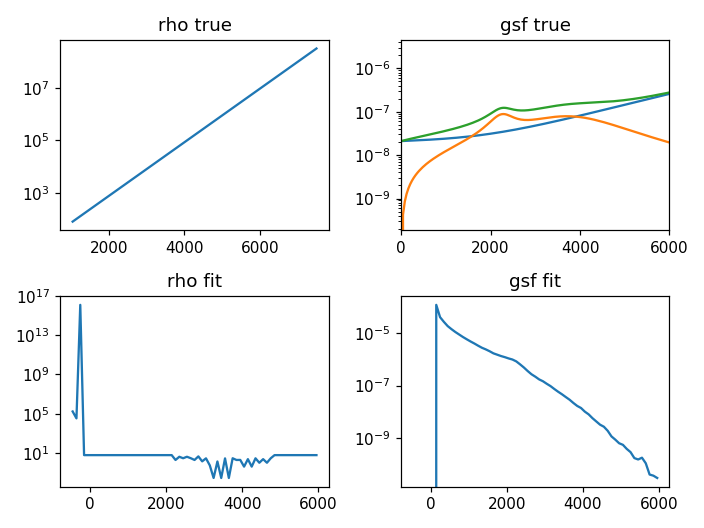

In [26]:
rho, T = om.fit_rho_T(fg, fg_std, bin_width_out,
                      Ex_min, Ex_max, Eg_min,
                      method="Powell",
                      negatives_penalty = 1e20
                     )


f, ((axrhot, axgsft), (axrho, axgsf)) = plt.subplots(2,2)
rho.plot(ax=axrho, yscale="log", title="rho fit")

# Convert T to gsf and then plot
#T.plot(ax=axT, yscale="log", title="T fit")
gsf = om.Vector(E_array=T.E_array, vector=om.div0(T.vector, T.E_array**3))
gsf.plot(ax=axgsf, yscale="log", title="gsf fit")

# Load true RAINIER inputs from file:
fname_gsf = "synthetic_data/Jint_EB06_mama_4res/GSFTable_py.dat"
gsft = np.loadtxt(fname_gsf, skiprows=1)
E_gsft, gsft_E1, gsft_M1 = gsft[:, 0], gsft[:, 1], gsft[:, 2]
E_gsft *= 1000 # to keV
axgsft.plot(E_gsft, gsft_E1, label="E1")
axgsft.plot(E_gsft, gsft_M1, label="M1")
axgsft.plot(E_gsft, gsft_E1+gsft_M1, label="E1+M1")
axgsft.set_yscale("log")
axgsft.set_xlim([0, 6000])
axgsft.set_title("gsf true")


fname_rho = "synthetic_data/Jint_EB06_mama_4res/NLDcont.dat"
rhot = np.loadtxt(fname_rho, skiprows=1)
E_rhot, rhot = rhot[:, 0], rhot[:, 1]
E_rhot *= 1000 # to keV
axrhot.plot(E_rhot, rhot)
axrhot.set_yscale("log")
axrhot.set_title("rho true")

plt.tight_layout(True)